# Question 4 - Visualisations simples #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import matplotlib.patches as mpatches
import seaborn as sns
from visualizations import *


## 1. Graphique comparant les types de tirs de toutes les équipes dans la saison 2023-2024 ##

In [2]:
"""
Fonction pour annoter les barres dans un histogramme.
"""
def add_bar_labels(bars, type, precision=1):
    for bar in bars:
        for patch in bar.patches:
            height = patch.get_height()
            if type == 'int':
                if height > 0:  # Ne rien annoter pour les bares d'hauteur 0
                    plt.text(
                        patch.get_x() + patch.get_width() / 2,  # Centrer horizontalement sur la bare
                        height,
                        f"{int(height)}",   # Texte annoté
                        ha='center', va='bottom', fontsize=8
                    )
            if type == 'float':
                if height > 0:
                    plt.text(
                        patch.get_x() + patch.get_width() / 2,
                        height,
                        f"{round(height, precision)}",  # Texte annoté
                        ha='center', va='bottom', fontsize=8
                    )

In [3]:
"""-------- TRAITEMENT DES DONNÉES --------"""

# Obtention des données
df = get_season_df('2023-2024')                      # Données de la saison
type_frequency_df = get_shots_frequency_by_type(df)  # Fréquences pour chaque type de tir

# Trier pour une meilleure visualisation 
# (par nombre de tirs, ordre décroissant)
type_frequency_df = type_frequency_df.sort_values(by='Shot', ascending=False)

# Extraire données triées
shot_types = type_frequency_df.index.tolist()
shots_count = type_frequency_df['Shot'].tolist()
goals_count = type_frequency_df['Goal'].tolist()

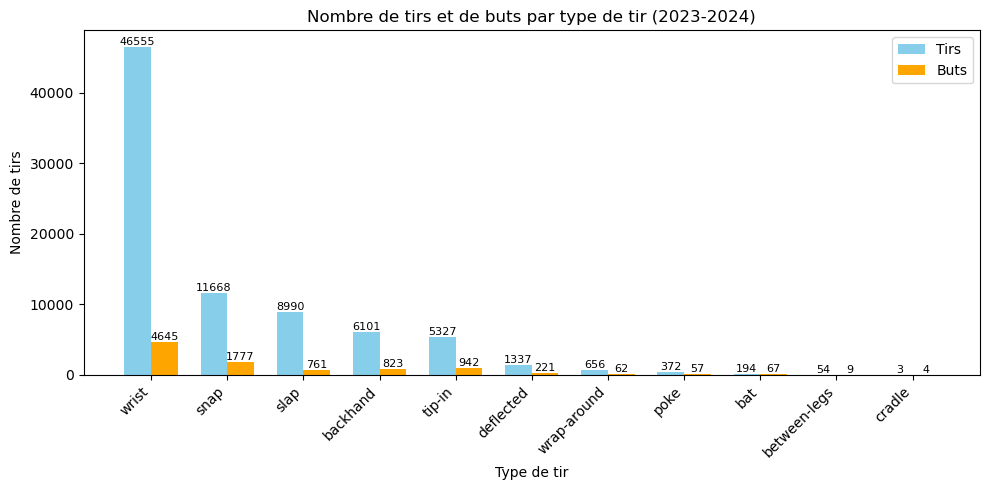

In [4]:
"""-------- GRAPHIQUE: Histogramme (barres côte à côte) --------"""

x = np.arange(len(shot_types))  # Positions des barres
width = 0.35                    # Largeur des barres

plt.figure(figsize=(10,5))

# Afficher les barres 
shots_bars = plt.bar(x - width/2, shots_count, width, label='Tirs', color='skyblue')
goals_bars = plt.bar(x + width/2, goals_count, width, label='Buts', color='orange')
add_bar_labels([shots_bars, goals_bars], 'int')  # Annoter les barres avec sa valeur

# Titre et étiquettes
plt.ylabel('Nombre de tirs')
plt.xlabel('Type de tir')
plt.title('Nombre de tirs et de buts par type de tir (2023-2024)')
plt.xticks(x, shot_types, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
"""-------- TRAITEMENT DES DONNÉES --------"""

# Calculer le nombre total de tirs (buts ou pas) pour chaque type
type_frequency_df['Total'] = type_frequency_df['Shot'] + type_frequency_df['Goal']

# Calculer la proportion des buts (#buts/#total de tirs) pour chaque type
type_frequency_df['Proportion'] = type_frequency_df['Goal'] / type_frequency_df['Total']

# Trier les valeur pour une meilleure visualisation (par proportion, ordre décroissant)
type_frequency_df = type_frequency_df.sort_values(by='Proportion', ascending=False)
shot_types = type_frequency_df.index.tolist()

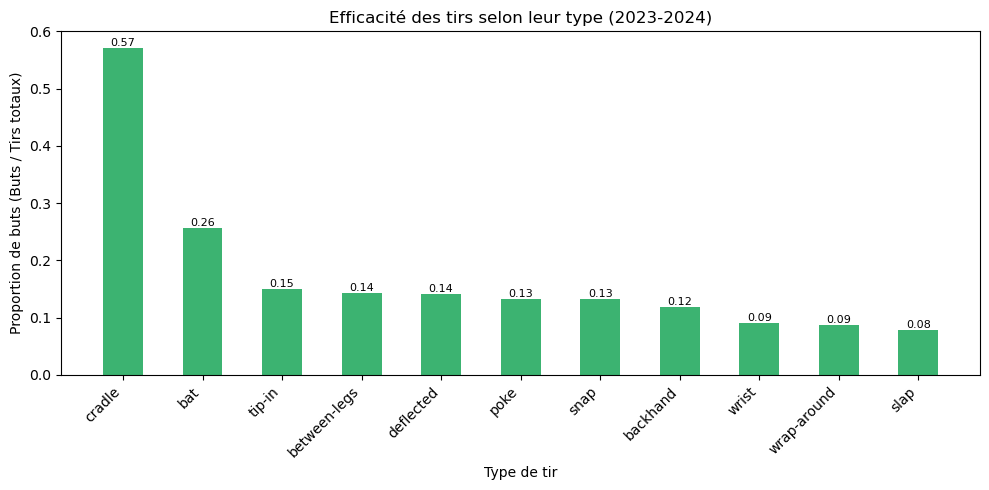

In [6]:
"""-------- GRAPHIQUE: Histogramme (proportion de #buts/#total de tirs) --------"""

plt.figure(figsize=(10,5))

# Positions des barres
x = np.arange(len(shot_types)) 

# Afficher les barres
proportion_bars = plt.bar(x, type_frequency_df['Proportion'], width= 0.5, color='mediumseagreen')
add_bar_labels([proportion_bars], 'float', 2)

# Titre et étiquettes
plt.title('Efficacité des tirs selon leur type (2023-2024)')
plt.ylabel('Proportion de buts (Buts / Tirs totaux)')
plt.xlabel('Type de tir')
plt.xticks(x, shot_types, rotation=45, ha='right')

plt.tight_layout()
plt.show()



### (b) Trouver la distance des tirs ###

* Code disponible dans le fichier '**visualizations.py**' _(voir les fontions '**get_event_distance**' et '**get_shots_distances**')_

### (a) Relation entre la distance à laquelle un tir a été effectué et la chance qu'il s'agisse d'un but ###

In [7]:
"""-------- GRAPHIQUE: Courbe de la fréquence d'appartition de chaque distance. --------"""

def smoothCurvePlot(df, season):
    
    # --- DONNÉES ---
    
    # Nombre de tirs manqués par distance
    shots_distance_frequency = df[df['Event Type'] == 'Shot']['Distance'].value_counts().sort_index()
    # Nombre de buts par distance
    goals_distance_frequency = df[df['Event Type'] == 'Goal']['Distance'].value_counts().sort_index()

    # Distances de tir (x = distance unique, y = fréquence des tirs à cette distance)
    shots_x = np.array(shots_distance_frequency.index)
    shots_y = np.array(shots_distance_frequency.values)

    # Distances des buts (x = distance unique, y = fréquence des buts à cette distance)
    goals_x = np.array(goals_distance_frequency.index)
    goals_y = np.array(goals_distance_frequency.values)
    
    
    
    # --- GRAPHIQUE ---

    plt.figure(figsize=(10, 5))

    # Lisser les fréquences avec un filtre gaussien pour atténuer les fluctuations brusques
    shots_y_smooth = gaussian_filter1d(shots_y, sigma=2)
    goals_y_smooth = gaussian_filter1d(goals_y, sigma=2)
    
    # Données brutes (points)
    plt.scatter(shots_x, shots_y, color="skyblue", alpha=0.5, marker=".", label="Tirs (bruts)")
    plt.scatter(goals_x, goals_y, color="orange", alpha=0.5, marker=".", label="Buts (bruts)")

    # Courbes lissées pour visualiser la tendance générale
    plt.plot(shots_x, shots_y_smooth, color="skyblue", label="Tirs (lissés, σ=2)", linewidth=2)
    plt.plot(goals_x, goals_y_smooth, color="orange", label="Buts (lissés, σ=2)", linewidth=2)

    # Titre et étiquettes
    plt.title(f'Tirs vs Buts en fonction de la distance ({season})')
    plt.xticks(np.arange(0, max(max(shots_x), max(goals_x)) + 10, 10))
    plt.xlabel('Distance (pieds)')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [8]:
"""-------- GRAPHIQUE: Probabilité qu'un tir soit un but en fonction de la distance. --------"""
def goalChancePlot(df, season):
    
    # --- DONNÉES ---
    
    # Nombre de tirs manqués par distance
    shots_distance_frequency = df[df['Event Type'] == 'Shot']['Distance'].value_counts().sort_index()
    # Nombre de buts par distance
    goals_distance_frequency = df[df['Event Type'] == 'Goal']['Distance'].value_counts().sort_index()

    # Nombre total de tirs par distance (tirs + buts)
    total_shots_distance_frequency = shots_distance_frequency.add(goals_distance_frequency, fill_value=0)

    # Probabilité qu'un tir à une distance donnée devienne un but (#buts/#total de tirs --> à chaque distance)
    goal_chance_by_distance = goals_distance_frequency.divide(total_shots_distance_frequency, fill_value=0)


    # Lisser les probabilités avec un filtre gaussien pour atténuer les fluctuations brusques
    chance_smooth = gaussian_filter1d(goal_chance_by_distance.values, sigma=2)
    
    
    
    # --- GRAPHIQUE ---

    plt.figure(figsize=(10, 5))

    # Données brutes (points)
    plt.scatter(
        goal_chance_by_distance.index, 
        goal_chance_by_distance.values, 
        color='royalblue', 
        label='Données brutes', 
        zorder=2,
        marker=".",
        alpha=0.5
    )

    # Courbe lissée
    plt.plot(
        goal_chance_by_distance.index, 
        chance_smooth, 
        color='royalblue', 
        label='Courbe lissée (filtre gaussien, σ=2)', 
        linewidth=2, 
        zorder=1,
        alpha=1
    )

    # Titre et étiquettes
    plt.xticks(np.arange(0, max(goal_chance_by_distance.index) + 10, 10))
    plt.title(f'Probabilité de but en fonction de la distance ({season})')
    plt.xlabel('Distance du tir (pieds)')
    plt.ylabel('Probabilité de but')
    plt.grid(True)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

#### Saison 2018-2019 ####

**<u>IMPORTANT</u>:**

Pour cette saison, les données concernant le côté défensif de l’équipe locale n’ont pas été enregistrées. Cette information est pourtant nécessaire pour déterminer de quelle partie de la zone neutre (neutre-offensive ou neutre-défensive) un tir a été effectué. En conséquence, nous avons décidé d’assumer que tous les tirs provenant de la zone neutre ont été réalisés depuis la zone neutre-offensive. Ainsi, la distance à la cage la plus proche (la plus petite distance) sera utilisée pour représenter la distance du tir.

Cette décision se justifie par le fait qu’il est beaucoup plus probable qu’un tir effectué depuis la zone neutre provienne de la zone neutre-offensive plutôt que de la zone neutre-défensive (comme l’indiquent les graphiques des autres saisons). Vous observerez donc, sur les graphiques de cette saison, une ligne droite nulle entre les distances de 98 et 115, mais cela n’affecte pas la tendance générale ni l’interprétation des résultats.

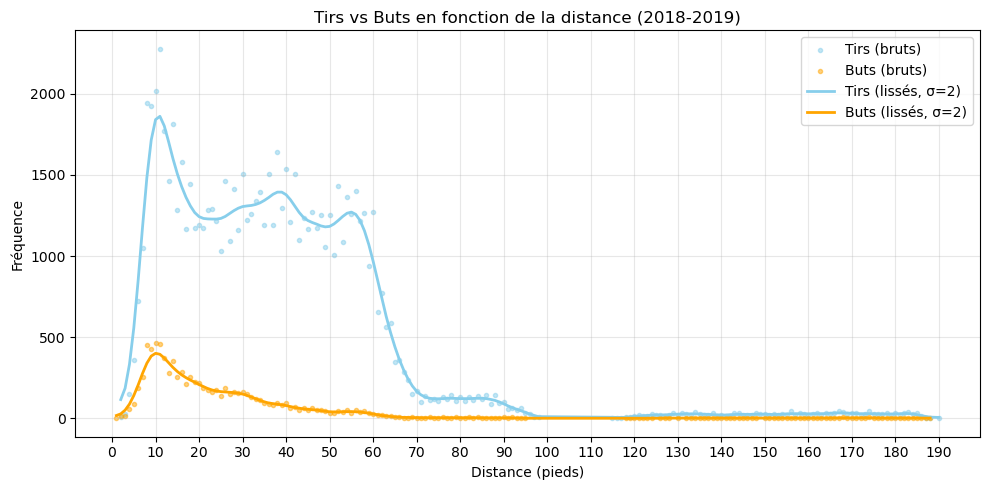

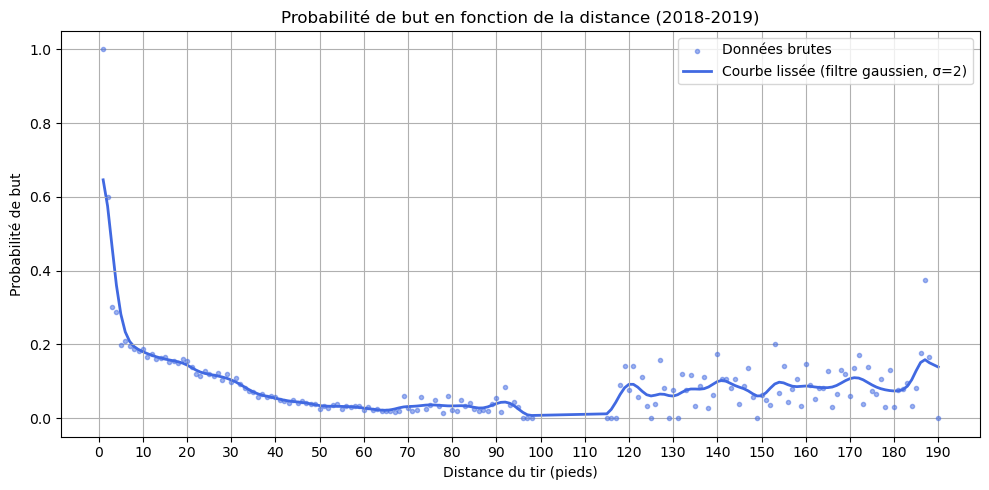

In [9]:
rounded_df = get_shots_distances('2018-2019', rounded=True)

smoothCurvePlot(rounded_df, '2018-2019')
goalChancePlot(rounded_df, '2018-2019')

#### Saison 2019-2020 ####

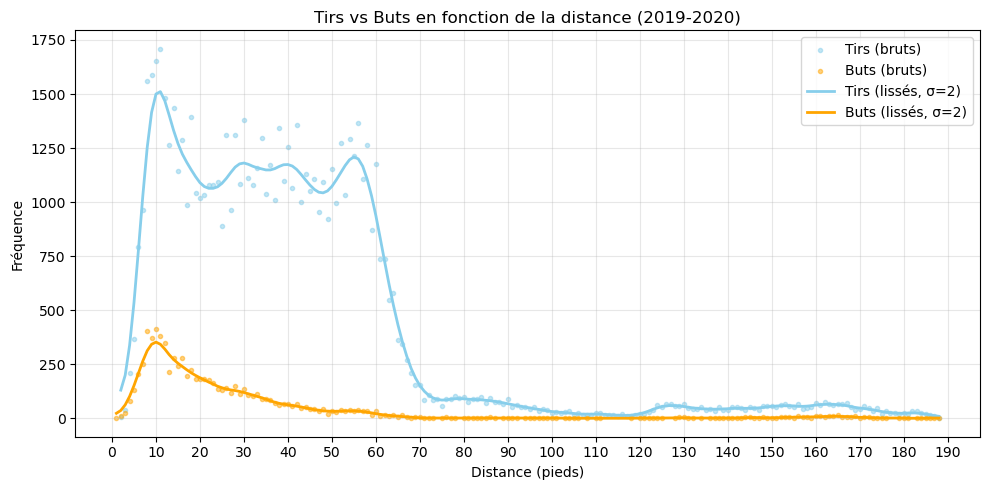

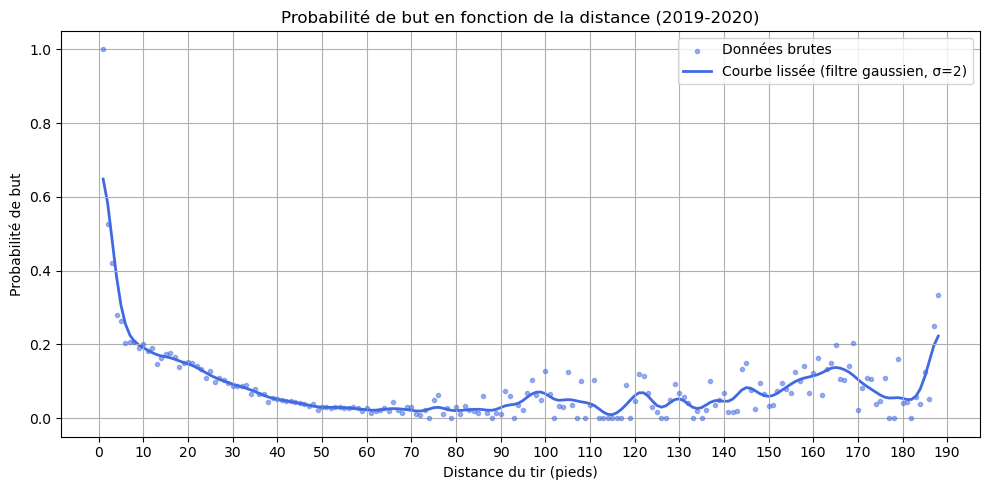

In [10]:
rounded_df = get_shots_distances('2019-2020', rounded=True)

smoothCurvePlot(rounded_df, '2019-2020')
goalChancePlot(rounded_df, '2019-2020')

#### Saison 2020-2021 ####

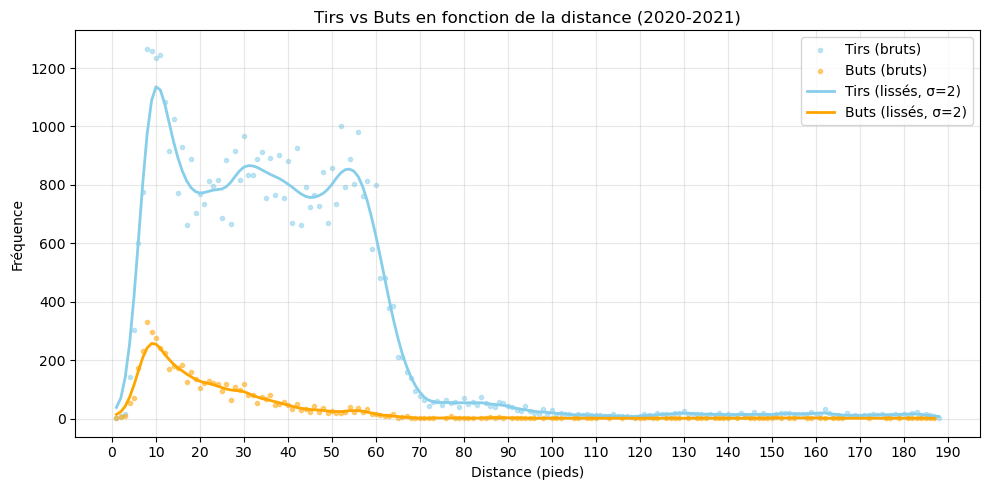

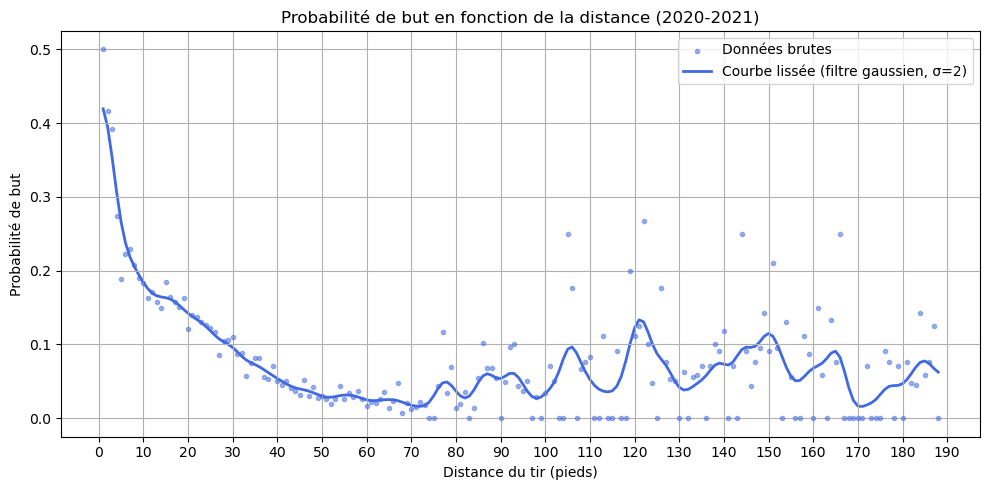

In [11]:
rounded_df = get_shots_distances('2020-2021', rounded=True)

smoothCurvePlot(rounded_df, '2020-2021')
goalChancePlot(rounded_df, '2020-2021')

## 2. Pourcentage de buts en fonction de la distance et du type de tir pour la saison 2023-2024 ##

In [12]:
"""-------- TRAITEMENT DES DONNÉES --------"""

rounded_df = get_shots_distances('2023-2024', rounded=True)


# --- TIRS RATÉS ---
shots_distance = rounded_df[rounded_df['Event Type']=='Shot']
grouped_shots_data = shots_distance.groupby(['Type of Shot', 'Distance'])
# Nombre de tirs par type et par distance
shots_distance_frequency_by_type = grouped_shots_data.size().unstack(fill_value=0)

# --- BUTS ---
goals_distance = rounded_df[rounded_df['Event Type']=='Goal']
grouped_goals_data = goals_distance.groupby(['Type of Shot', 'Distance'])
# Nombre de buts par type et par distance
goals_distance_frequency_by_type = grouped_goals_data.size().unstack(fill_value=0)


# Nombre de total tirs par type et par distance
total_shots_distance_frequency_by_type = shots_distance_frequency_by_type.add(goals_distance_frequency_by_type, fill_value=0)

# Pourcentage de buts en fonction du type et de la distance
goal_percentage_by_distance_and_type = goals_distance_frequency_by_type.divide(total_shots_distance_frequency_by_type, fill_value=0)

# Inclure toutes les distances possibles (même celles où il n’y a pas de tirs)
distances = goal_percentage_by_distance_and_type.columns
full_distances = np.arange(distances.min(), distances.max() + 1)
goal_percentage_by_distance_and_type = goal_percentage_by_distance_and_type.reindex(columns=full_distances, fill_value=np.nan)

# Réorganiser les lignes pour favoriser la visualisation
order = [
    'cradle',
    'between-legs',
    'wrap-around',
    'bat',
    'poke',
    'deflected',
    'tip-in',
    'slap',
    'backhand',
    'snap',
    'wrist'
]
goal_percentage_by_distance_and_type = goal_percentage_by_distance_and_type.reindex(order)


# Extraire les distances (colonnes) et les types de tirs (lignes)
distances = goal_percentage_by_distance_and_type.columns
shot_types = goal_percentage_by_distance_and_type.index



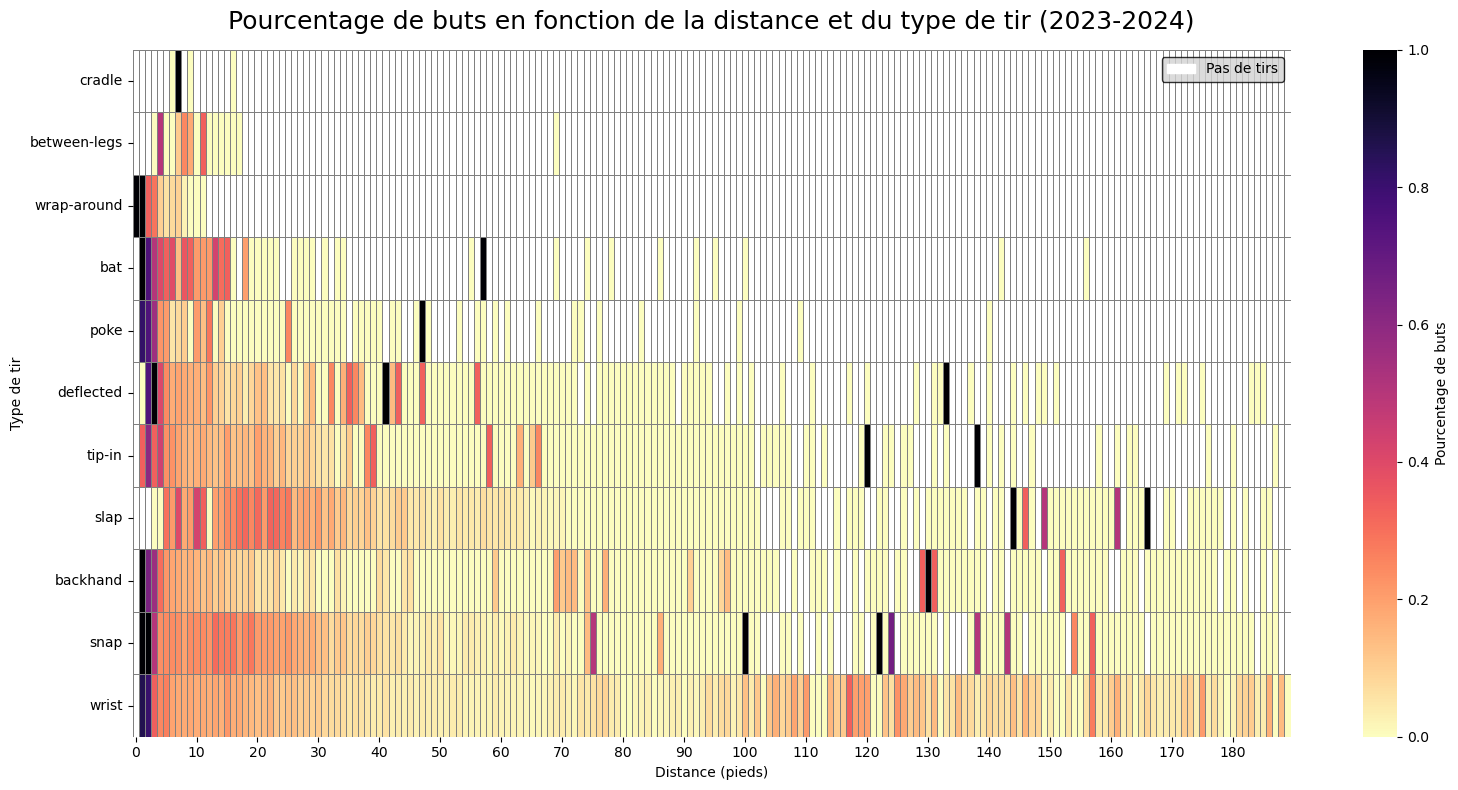

In [13]:
"""-------- GRAPHIQUE: Heatmap du pourcentage de buts en fonction de la distance et du type de tir. --------"""

plt.figure(figsize=(16, 8))

# -- Couleurs --
cmap = plt.colormaps.get_cmap("magma_r").copy()     # Couleur
mask = goal_percentage_by_distance_and_type.isna()  # Masque pour les cellules sans tirs (NaN)
cmap.set_bad(color='white')                         # Couleur pour les cellules sans tirs (NaN)


# -- Heatmap --
sns.heatmap(
    goal_percentage_by_distance_and_type,  # Données
    cmap=cmap,                             # Couleurs
    mask = mask,                           # Masquer les NaN (affichés en blanc)
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={'label': 'Pourcentage de buts'}  # Légende de la barre de couleurs
)


# Titre et étiquettes
plt.title('Pourcentage de buts en fonction de la distance et du type de tir (2023-2024)', fontsize=18, pad=15)
plt.xlabel('Distance (pieds)')
xticks = np.arange(0, len(distances), 10)
xtick_labels = distances[xticks]
plt.xticks(ticks=xticks + 0.5, labels=xtick_labels, rotation=0)
plt.ylabel('Type de tir')

# Légende pour les cellules sans tirs
no_data_patch = mpatches.Patch(color='white', label='Pas de tirs')
plt.legend(handles=[no_data_patch],
           loc='upper right',
           frameon=True,
           facecolor='lightgray',
           edgecolor='black')

plt.tight_layout()
plt.show()

In [14]:
"""-------- TRAITEMENT DES DONNÉES --------"""

# Extraire les distances (colonnes) et les types de tirs (lignes)
distances = total_shots_distance_frequency_by_type.columns
shot_types = total_shots_distance_frequency_by_type.index

# Réorganiser les lignes pour favoriser la visualisation
order = [
    'cradle',
    'between-legs',
    'wrap-around',
    'bat',
    'poke',
    'deflected',
    'tip-in',
    'slap',
    'backhand',
    'snap',
    'wrist'
]
total_shots_distance_frequency_by_type = total_shots_distance_frequency_by_type.reindex(order)

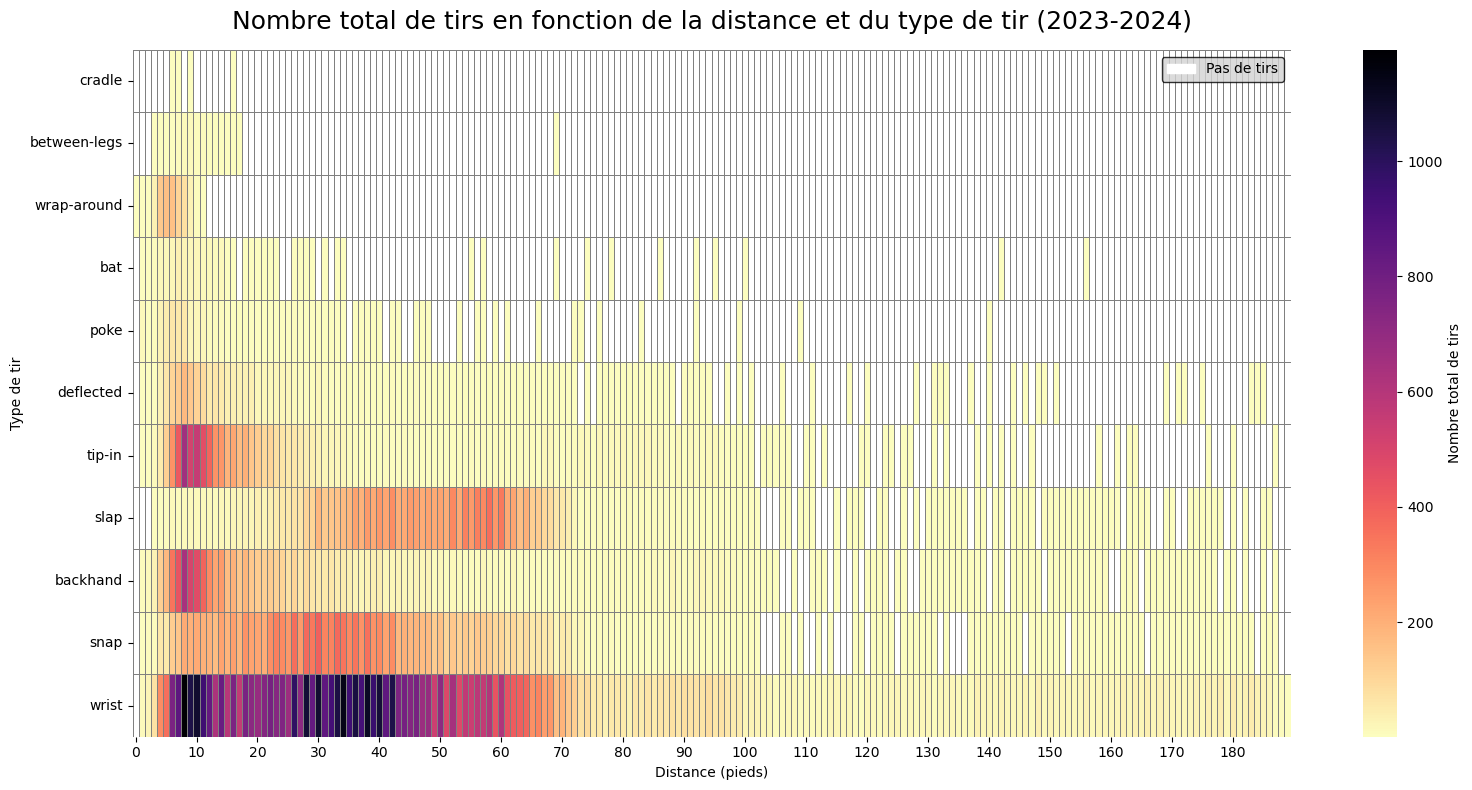

In [15]:
"""-------- GRAPHIQUE: Heatmap du nombre total de tirs en fonction de la distance et du type. --------"""

plt.figure(figsize=(16, 8))

# -- Couleurs --
cmap = plt.colormaps.get_cmap("magma_r").copy()     # Couleur
mask = total_shots_distance_frequency_by_type == 0  # Masque pour les cellules sans tirs (0)
cmap.set_bad(color='white')                         # Couleur pour les cellules sans tirs (0)

# -- Heatmap --
sns.heatmap(
    total_shots_distance_frequency_by_type,  # Données
    cmap=cmap,                               # Couleurs
    mask=mask,                               # Masquer les 0 (affichés en blanc)
    linewidths=0.5,
    linecolor="gray",
    cbar_kws={'label': 'Nombre total de tirs'}  # Légende de la barre de couleurs
)


# Titre et étiquettes
plt.title('Nombre total de tirs en fonction de la distance et du type de tir (2023-2024)', fontsize=18, pad=15)
plt.xlabel('Distance (pieds)')
xticks = np.arange(0, len(distances), 10)
xtick_labels = distances[xticks]
plt.xticks(ticks=xticks + 0.5, labels=xtick_labels, rotation=0)
plt.ylabel('Type de tir')

# Légende pour les cellules sans tirs
no_data_patch = mpatches.Patch(color='white', label='Pas de tirs')
plt.legend(handles=[no_data_patch],
           loc='upper right',
           frameon=True,
           facecolor='lightgray',
           edgecolor='black')

plt.tight_layout()
plt.show()